## EDA

### Librerías

In [27]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Configuraciones

In [28]:
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

### Carga de datos

In [29]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\dataset_limpio.csv")

In [30]:
df.head(2) #Comprobamos que el dataframe se ha cargado correctamente

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magSource,año,mes,dia,hora,dia_semana,fecha,minuto,mag_obj,depth_obj
0,2025-05-02 02:50:02.380,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,Sin datos,0.20,...,ci,2025,5,2,2,Friday,2025-05-02,50,Bajo,Superficial
1,2025-05-02 02:39:31.940,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.1396,0.15,...,ci,2025,5,2,2,Friday,2025-05-02,39,Bajo,Superficial


In [31]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
año                  0
mes                  0
dia                  0
hora                 0
dia_semana           0
fecha                0
minuto               0
mag_obj            637
depth_obj          372
dtype: int64

#### Distribución de tipos de eventos sísmicos

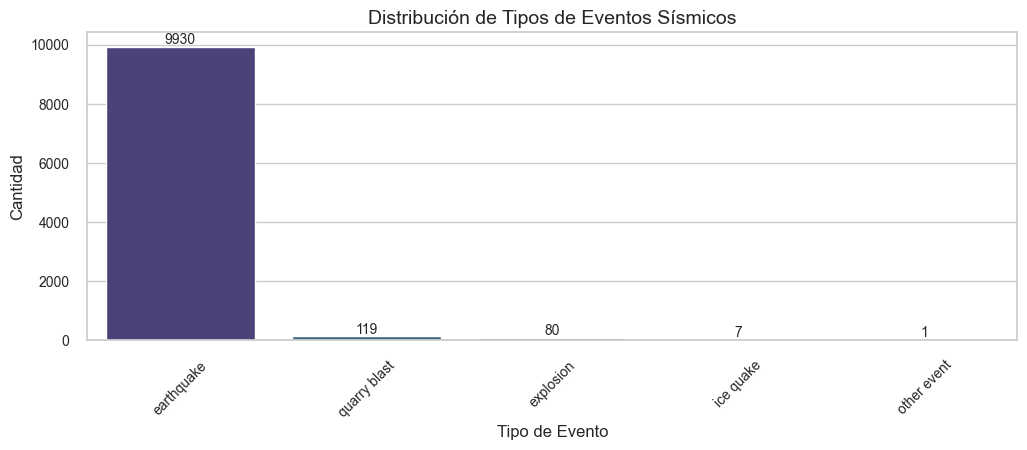

In [ ]:
# Contamos los tipos de eventos sísmicos
event_counts = df['type'].value_counts()

# Creamos el gráfico de barras
ax = sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')

# Añadimos etiquetas con los valores en cada barra
for i, value in enumerate(event_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Configuramos el gráfico
plt.title('Distribución de Tipos de Eventos Sísmicos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
""" Este histograma de frecuencias muestra la distribución de los tipos de eventos sísmicos del dataset.

Distribución: 
    ·Earthquake es, con gran diferencia, el tipo más común, con casi 10,000 eventos.
    ·Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparación.

Conclusiones:
    1.Predominio de los Terremotos:
    Los terremotos (earthquakes) son, con diferencia, el tipo de evento sísmico más común, con 9930 registros, representando más del 99% del total.

    2.Eventos Minoritarios:
    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente más bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.

    3.Desbalance en la Clasificación:
    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, probablemente debido a que las redes sísmicas están optimizadas para detectar terremotos.

    4.Posible Subrepresentación:
    Algunos tipos como ice quake y other event parecen estar subrepresentados, lo que podría estar relacionado con la ubicación geográfica o la sensibilidad de los sensores.

    5.Importancia de los Datos Contextuales:
    Para comprender mejor esta distribución, sería importante considerar factores como la región de muestreo, la profundidad y la energía liberada por cada tipo de evento.#





#### Comparación de magnitud por tipos de evento sísmico

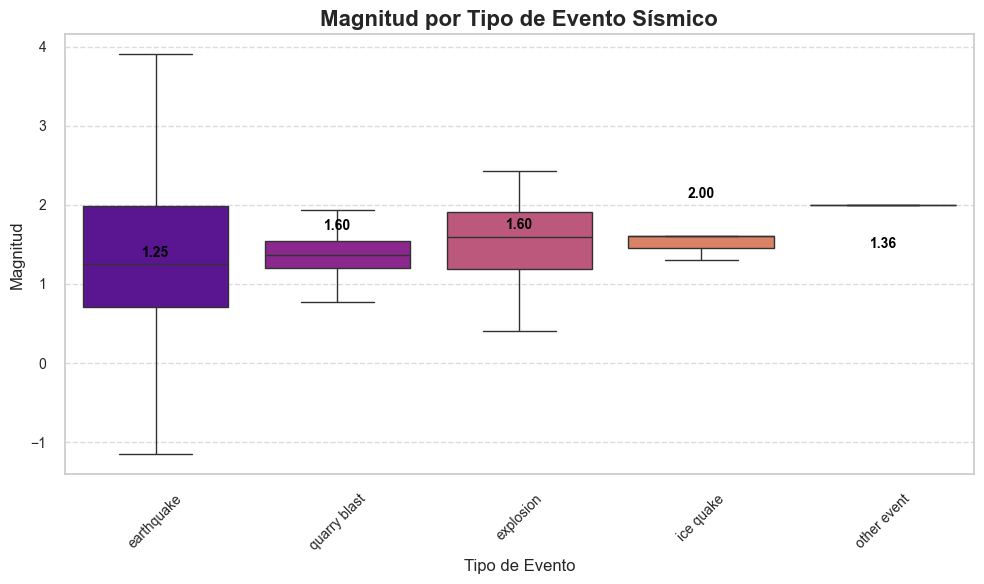

In [43]:
# Creamos un gráfico de caja para mostrar la magnitud por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='mag', palette='plasma', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja
medians = df.groupby('type')['mag'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Configuramos el gráfico
plt.title('Magnitud por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Comparación de profundidad por tipo de evento sísmico

In [ ]:
# Creamos un gráfico de caja para mostrar la profundidad por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='depth', palette='magma', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja
medians = df.groupby('type')['depth'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 1, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Configuramos el gráfico
plt.title('Profundidad por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Profundidad (km)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Distribución de magnitud por tipo de evento sísmico

In [ ]:
# Creamos un gráfico de violín para mostrar la distribución de magnitud por tipo de evento sísmico
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='type', y='mag', palette='viridis', inner='quartile')

# Configuramos el gráfico
plt.title('Distribución de Magnitud por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Distribución de profundidad por tipo de evento sísmico

#### Relación entre magnitud y profundidad por tipo de evento sísmico

#### Mapa de calor de los terremotos

#### Conclusiones generales